In [5]:
import numpy as np
import matplotlib.pyplot as plt

import os

In [9]:
cold=np.fromfile(open(os.getcwd() + "/test_data/cold_1"), dtype=np.float32)
hot=np.fromfile(open(os.getcwd() + "/test_data/hot_1"), dtype=np.float32)
measure=np.fromfile(open(os.getcwd() + "/test_data/m1"), dtype=np.float32)

In [10]:
f=cold
Vector_length = int(2**13)
print(np.shape(f)[0]/Vector_length)


central_freq = 1420.405751768e6
# central_freq = 1420e6
Bandwidth = 6e6
frequency_spacing=Bandwidth/Vector_length
freq = (np.linspace((central_freq-Bandwidth/2), central_freq + Bandwidth/2 , Vector_length)/1e6) - central_freq/1e6
f = f[0:Vector_length]

1.0


In [11]:
def plot(f):
    f = f[0:Vector_length]
    fig,ax=plt.subplots(figsize=(10,5))
    ax.axvline(x=0/1e6, color='r', linestyle='--', label='test HI 21cm line')
    ax.step(freq,10**f,where='mid',label='Frequency Spectrum')
    ax.set_xlabel(r"Frequency ($\Delta \nu$) [MHz]")
    ax.set_ylabel("Amplitude")
    ax.set_title("Frequency Spectrum")
    ax.grid()
    ax.legend()

In [25]:
sum_shape_normalization = 10**hot/np.sum(10**hot)
max_shape_normalization = 10**hot/np.max(10**hot)
mean_shape_normalization = 10**hot/np.mean(10**hot)


Th=285
Tc=7

def Tsys(Y):
    return (Th-Tc*Y)/(Y-1)
Tsys_nu= Tsys(10**hot/10**cold)


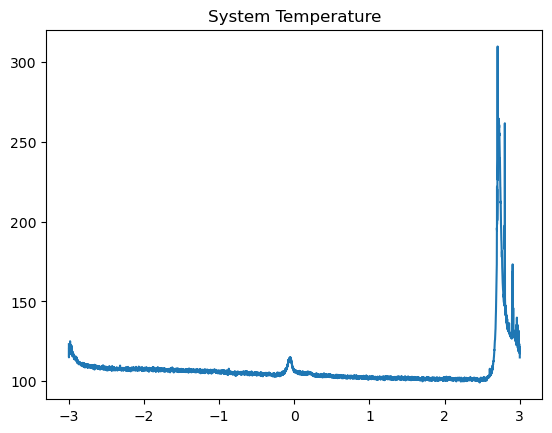

In [17]:
plt.title("System Temperature")

plt.plot(freq,Tsys_nu)
plt.show()

In [13]:
def flat_field(data, shape_norm):
    return 10**data / shape_norm

In [14]:
hot_sum_shape_norm = flat_field(hot, sum_shape_normalization)
cold_sum_shape_norm = flat_field(cold, sum_shape_normalization)
measure_sum_shape_norm = flat_field(measure, sum_shape_normalization)

In [19]:
print(f"normalized hot\nmax: {np.max(hot_sum_shape_norm)}\nmin: {np.min(hot_sum_shape_norm)}\nrange: {np.max(hot_sum_shape_norm) - np.min(hot_sum_shape_norm)}\nmean: {np.mean(hot_sum_shape_norm)}")
print(f"\nnormalized cold\nmax: {np.max(cold_sum_shape_norm)}\nmin: {np.min(cold_sum_shape_norm)}\nrange: {np.max(cold_sum_shape_norm) - np.min(cold_sum_shape_norm)}\nmean: {np.mean(cold_sum_shape_norm)}")

normalized hot
max: 27181498368.0
min: 27181494272.0
range: 4096.0
mean: 27181494272.0

normalized cold
max: 14479836160.0
min: 7509911040.0
range: 6969925120.0
mean: 7917050368.0


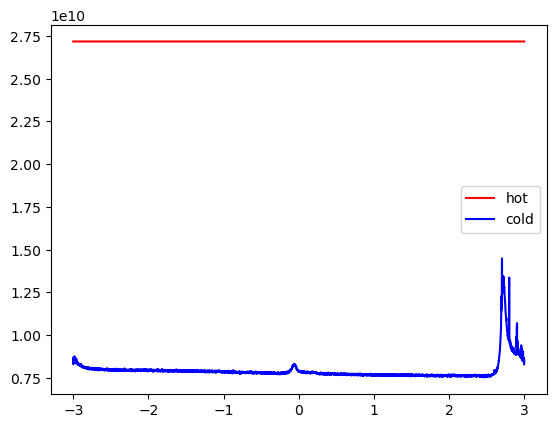

In [21]:
plt.plot(freq, hot_sum_shape_norm, "r-", label="hot")
plt.plot(freq, cold_sum_shape_norm, "b-", label="cold")

plt.legend()

plt.show()

In [22]:
hot_max_shape_norm = flat_field(hot, max_shape_normalization)
cold_max_shape_norm = flat_field(cold, max_shape_normalization)
measure_max_shape_norm = flat_field(measure, max_shape_normalization)

In [23]:
print(f"normalized hot\nmax: {np.max(hot_max_shape_norm)}\nmin: {np.min(hot_max_shape_norm)}\nrange: {np.max(hot_max_shape_norm) - np.min(hot_max_shape_norm)}\nmean: {np.mean(hot_max_shape_norm)}")
print(f"\nnormalized cold\nmax: {np.max(cold_max_shape_norm)}\nmin: {np.min(cold_max_shape_norm)}\nrange: {np.max(cold_max_shape_norm) - np.min(cold_max_shape_norm)}\nmean: {np.mean(cold_max_shape_norm)}")

normalized hot
max: 7064928.5
min: 7064927.5
range: 1.0
mean: 7064928.0

normalized cold
max: 3763552.75
min: 1951952.125
range: 1811600.625
mean: 2057774.5


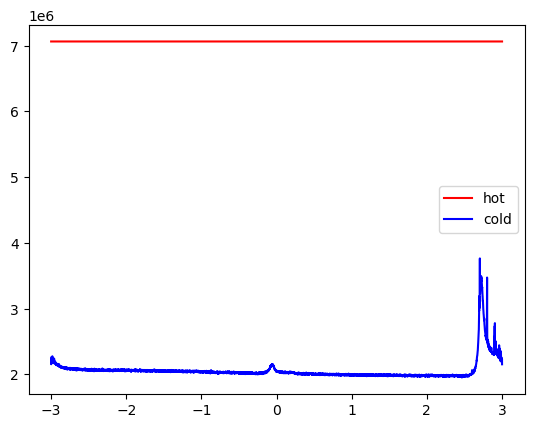

In [24]:
plt.plot(freq, hot_max_shape_norm, "r-", label="hot")
plt.plot(freq, cold_max_shape_norm, "b-", label="cold")

plt.legend()

plt.show()

In [27]:
hot_mean_shape_norm = flat_field(hot, mean_shape_normalization)
cold_mean_shape_norm = flat_field(cold, mean_shape_normalization)
measure_mean_shape_norm = flat_field(measure, mean_shape_normalization)

print(f"normalized hot\nmax: {np.max(hot_mean_shape_norm)}\nmin: {np.min(hot_mean_shape_norm)}\nrange: {np.max(hot_mean_shape_norm) - np.min(hot_mean_shape_norm)}\nmean: {np.mean(hot_mean_shape_norm)}")
print(f"\nnormalized cold\nmax: {np.max(cold_mean_shape_norm)}\nmin: {np.min(cold_mean_shape_norm)}\nrange: {np.max(cold_mean_shape_norm) - np.min(cold_mean_shape_norm)}\nmean: {np.mean(cold_mean_shape_norm)}")

normalized hot
max: 3318054.0
min: 3318053.5
range: 0.5
mean: 3318053.5

normalized cold
max: 1767558.125
min: 916737.1875
range: 850820.9375
mean: 966436.8125


In [ ]:
plt.plot(freq, hot_mean_shape_norm, "r-", label="hot")
plt.plot(freq, cold_mean_shape_norm, "b-", label="cold")

plt.legend()

plt.show()